# Polynomial Curve Fitting

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Synthetic data generation 

In [7]:
def dataset_gen(fun,u,sigma):
    x = np.linspace(0,1,10)
    t = fun(x) + np.random.normal(u,sigma,np.shape(x))
    return x,t
    
def fun(x):
    return np.sin(2 * np.pi * x)


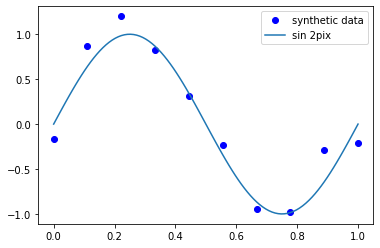

In [35]:
x,y = dataset_gen(fun, 0,0.2)
x_sample = np.linspace(0, 1, 100)

plt.plot(x, y, 'bo', label = "synthetic data") # or you can use plt.scatter(x,y)
plt.plot(x_sample,fun(x_sample),label = "sin 2pix")
plt.legend()
plt.show()

In [140]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

##### Fitting the [0, 1 ,3 , 5 ,9] degree polynomials to data

In [143]:
def poly_feature_transform(x,degree):
    transformed_x = []
    for i in np.arange(degree+1):
        transformed_x.append(np.power(x,i))
    # if degree == 0:
    #     print(transformed_x, np.shape(transformed_x))
    return np.asarray(transformed_x).transpose() 

    
                         

(10, 1)
(10, 2)
(10, 4)
[[1.         0.         0.         0.        ]
 [1.         0.11111111 0.01234568 0.00137174]
 [1.         0.22222222 0.04938272 0.01097394]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.77777778 0.60493827 0.47050754]
 [1.         0.88888889 0.79012346 0.70233196]
 [1.         1.         1.         1.        ]] (10, 4)
(10,)
(10, 10)


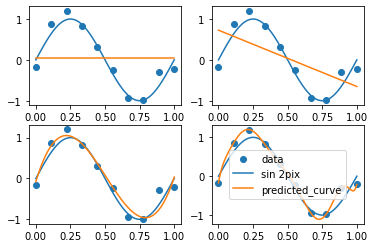

In [146]:
poly_degrees = [0, 1, 3, 9]
for i, degree in enumerate(poly_degrees):
    plt.subplot(2,2,i+1)
    x_train = poly_feature_transform(x, degree)
    print(np.shape(x_train))
    if degree == 3:
        print(x_train,np.shape(x_train))
        print(np.shape(y))
    w_param = np.linalg.pinv(x_train) @  y
    x_sample_transformed = poly_feature_transform(x_sample, degree)
    #print(w_param,np.shape(w_param))
    #print(np.shape(x_sample_transformed))
    y_pred_degree = x_sample_transformed @ w_param
    #print(x_sample, y_pred_degree)
    plt.scatter(x,y, label="data")
    plt.plot(x_sample, fun(x_sample), label = "sin 2pix")
    plt.plot(x_sample,y_pred_degree, label = "predicted_curve")
    
plt.legend()  
plt.show()